In [1]:
%matplotlib inline

In [2]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb

# Gaussian peak problem description

In [3]:
problem = ctb.CentralTendencyGaussianPeakProblem2M()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

In [4]:
problem.getMean()

2.9439816239704797

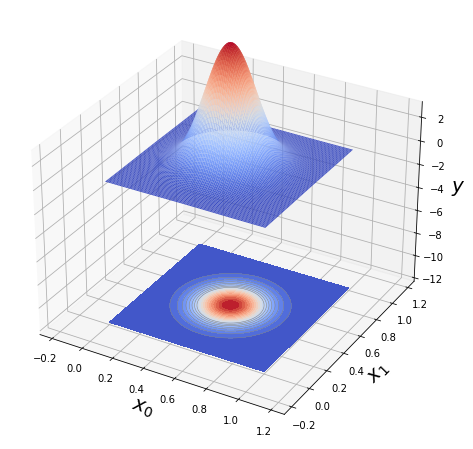

In [5]:
d = ctb.DrawFunctions()
fig = d.draw_full_3D(function, 'Gaussian peak function', -12)
fig

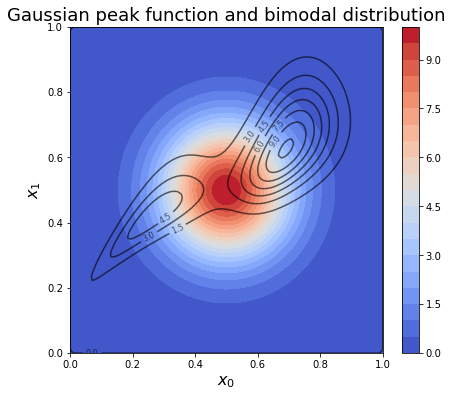

In [6]:
fig = d.draw_2D_controur('Gaussian peak function and bimodal distribution', function, distribution)
plt.savefig('figures/gaussian_peak2M.pdf', bbox_inches='tight');

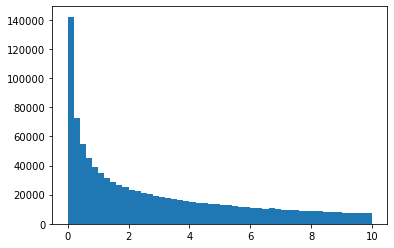

In [7]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = output_rv.getSample(int(1e6))
plt.hist(np.array(output_sample).flatten(), 50);

## Kernel based sampling methods

In [8]:
n = 20
doe_generator = ctb.CentralTendencyBenchmark()
candidate_points = doe_generator.generate_sample('sobol', 2**13, distribution, None)

In [9]:
kh_sample = doe_generator.generate_sample('kernel herding', n, None, candidate_points)
sp_sample = doe_generator.generate_sample('support points', n, None, candidate_points)

In [10]:
kh_weights = doe_generator.compute_bayesian_quadrature_weights(kh_sample, candidate_points)
sp_weights = doe_generator.compute_bayesian_quadrature_weights(sp_sample, candidate_points)

In [11]:
sp_weights

array([0.06886215, 0.02740185, 0.0671671 , 0.0677989 , 0.02658842,
       0.04979476, 0.00604218, 0.06230888, 0.08451058, 0.03935584,
       0.06582313, 0.04922863, 0.05264426, 0.09362409, 0.05081324,
       0.04245396, 0.03191245, 0.02302862, 0.02277801, 0.04077406])

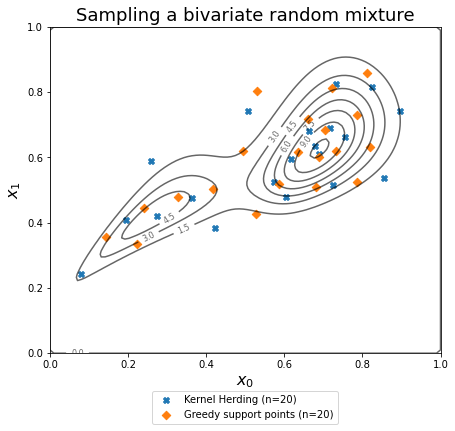

In [12]:
fig = d.draw_2D_controur('Sampling a bivariate random mixture', None, distribution)
#plt.scatter(mc_design[:, 0], mc_design[:, 1], label='Monte Carlo (n={})'.format(size), marker='o', alpha=0.5)
plt.scatter(kh_sample[:, 0], kh_sample[:, 1], label='Kernel Herding (n={})'.format(n), marker='X', color='C0')
plt.scatter(sp_sample[:, 0], sp_sample[:, 1], label='Greedy support points (n={})'.format(n), marker='D', color='C1')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center')
plt.savefig('figures/mixture_sampling.pdf', bbox_inches='tight');

/home/g88077/miniconda3/envs/kh_env/lib/python3.10/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/g88077/miniconda3/envs/kh_env/lib/python3.10/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


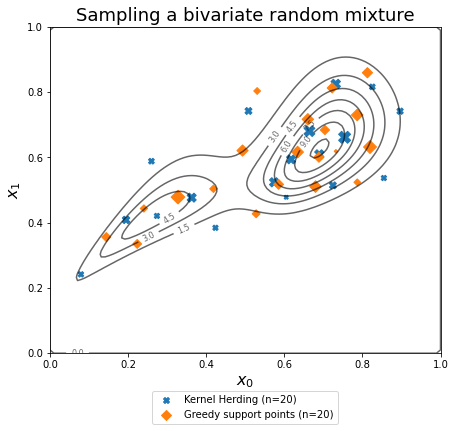

In [13]:
fig = d.draw_2D_controur('Sampling a bivariate random mixture', None, distribution)
#plt.scatter(mc_design[:, 0], mc_design[:, 1], label='Monte Carlo (n={})'.format(size), marker='o', alpha=0.5)
plt.scatter(kh_sample[:, 0], kh_sample[:, 1], label='Kernel Herding (n={})'.format(n), marker='X', color='C0', s=kh_weights*1000)
plt.scatter(sp_sample[:, 0], sp_sample[:, 1], label='Greedy support points (n={})'.format(n), marker='D', color='C1', s=sp_weights*1000)
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center')
plt.savefig('figures/weighted_mixture_sampling.pdf', bbox_inches='tight');

# Benchmark

In [14]:
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 160, 10))
my_methods = ['kernel herding', 'support points', 'sobol']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [15]:
df_benchmark = bench.run_benchmark([problem], candidate_points)
df_benchmark = df_benchmark.reset_index()
df_benchmark.to_csv('results/ct_benchmark_{}.csv'.format(problem_name), index=False)
df_benchmark

START: problem=Gaussian Peak 2D (mixture input) | method=kernel herding
START: problem=Gaussian Peak 2D (mixture input) | method=support points
START: problem=Gaussian Peak 2D (mixture input) | method=sobol
DONE: problem=Gaussian Peak 2D (mixture input) | method=sobol
DONE: problem=Gaussian Peak 2D (mixture input) | method=support points
DONE: problem=Gaussian Peak 2D (mixture input) | method=kernel herding


,Problem,Method,Size,mu,m,m*,MMD,weights sum
0,Gaussian Peak 2D (mixture input),kernel herding,6,2.943982,2.771647,2.819279,NaN,0.947054
1,Gaussian Peak 2D (mixture input),kernel herding,8,2.943982,3.003531,2.968752,NaN,0.941035
2,Gaussian Peak 2D (mixture input),kernel herding,10,2.943982,2.706469,2.963781,NaN,0.96918
3,Gaussian Peak 2D (mixture input),kernel herding,12,2.943982,2.895628,2.946054,NaN,0.974565
4,Gaussian Peak 2D (mixture input),kernel herding,14,2.943982,2.694406,2.924827,NaN,0.983469
...,...,...,...,...,...,...,...,...
67,Gaussian Peak 2D (mixture input),support points,110,2.943982,2.948413,2.944299,NaN,0.996586
68,Gaussian Peak 2D (mixture input),support points,120,2.943982,2.997703,2.943967,NaN,0.996796
69,Gaussian Peak 2D (mixture input),support points,130,2.943982,2.952328,2.944093,NaN,0.997163
70,Gaussian Peak 2D (mixture input),support points,140,2.943982,2.94339,2.944114,NaN,0.997167


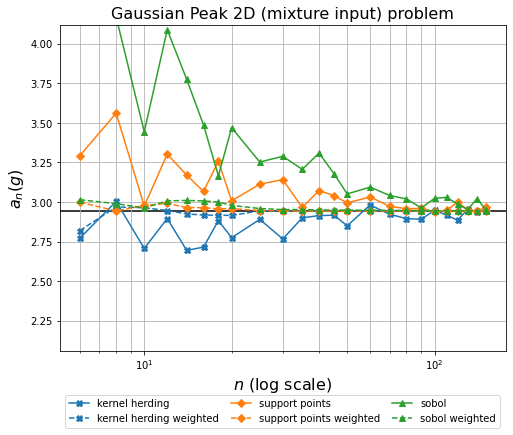

In [16]:
sfile = 'figures/{}_convergence.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=my_methods, save_file=sfile);